# ALE explanation using iris dataset

In [ ]:
!pip install alibi

     |████████████████████████████████| 225kB 2.6MB/s 
     |████████████████████████████████| 327kB 4.9MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 204kB 6.4MB/s 
     |████████████████████████████████| 28.0MB 140kB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456471 sha256=0e58ea50485e9fd76d1e818e06a1507a67e40b324bd21fdf7208fbfa6b76b755
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052144 sha256=0143de7b4c62f6322f41349ab57df83539d889e3efc951f85982f798181fe8c6
  Stored in directory: /root/.cache/pip/wheels/2a/2b/0a/d6fb6235c56d014d224bca760d15d7cbdd820813085ffcd35d
Successfully built shap spacy-lookups-data


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers.ale import ALE, plot_ale

Here we have used the Iris dataset

In [ ]:
data = pd.read_csv('/content/heartu.csv')
# To display the top 5 rows
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
heart = data.copy()

In [ ]:
target = 'condition'
features_list = list(heart.columns)
features_list.remove(target)

In [ ]:
y = heart.pop('condition')

In [ ]:
y.sum() / len(y)

0.4612794612794613

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart, y, test_size=0.2, random_state=33)
x_train=X_train.to_numpy()
x_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()


In [ ]:
features=['age','sex','cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal'	]
X = data[features]
y = data['condition']
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     69    1   0       160   234  ...      0      0.1      1   1     0
1     69    0   0       140   239  ...      0      1.8      0   2     0
2     66    0   0       150   226  ...      0      2.6      2   0     0
3     65    1   0       138   282  ...      0      1.4      1   1     0
4     64    1   0       110   211  ...      1      1.8      1   0     0
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
292   40    1   3       152   223  ...      0      0.0      0   0     2
293   39    1   3       118   219  ...      0      1.2      1   0     2
294   35    1   3       120   198  ...      1      1.6      1   0     2
295   35    0   3       138   183  ...      0      1.4      0   0     0
296   35    1   3       126   282  ...      1      0.0      0   0     2

[297 rows x 13 columns]


Splitting the data into training and testing set

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Using Logistic Regression Model

Fitting a logistic regression model

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation the model

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

0.9

Now we calculate the Accumulated Local Effects using two prediction functions:

1) Unnormalized logit space

2) Probability space

In [ ]:
logit_fun_lr = lr.decision_function
proba_fun_lr = lr.predict_proba

In [ ]:
logit_ale_lr = ALE(logit_fun_lr, feature_names=features, target_names=['0','1'])
proba_ale_lr = ALE(proba_fun_lr, feature_names=features, target_names=['0','1'])

In [ ]:
logit_exp_lr = logit_ale_lr.explain(X_train.values)
proba_exp_lr = proba_ale_lr.explain(X_train.values)
proba_exp_lr

Explanation(meta={
    'name': 'ALE',
    'type': ['blackbox'],
    'explanations': ['global'],
    'params': {'min_bin_points': 4}
}, data={
    'ale_values': [
        array([[-0.02696552,  0.02696552],
       [-0.01645695,  0.01645695],
       [-0.01448131,  0.01448131],
       [-0.01318824,  0.01318824],
       [-0.01096838,  0.01096838],
       [-0.00972132,  0.00972132],
       [-0.00808362,  0.00808362],
       [-0.00596257,  0.00596257],
       [-0.00450395,  0.00450395],
       [-0.00304176,  0.00304176],
       [-0.00209132,  0.00209132],
       [-0.00090789,  0.00090789],
       [ 0.00018612, -0.00018612],
       [ 0.00067962, -0.00067962],
       [ 0.00180975, -0.00180975],
       [ 0.00307898, -0.00307898],
       [ 0.00397356, -0.00397356],
       [ 0.00527609, -0.00527609],
       [ 0.00597384, -0.00597384],
       [ 0.00744656, -0.00744656],
       [ 0.00865312, -0.00865312],
       [ 0.00947823, -0.00947823],
       [ 0.01070684, -0.01070684],
       [ 0.01255342, -0.0

##Logit Space 
We first plot the ALE plots for calculating the unnormalized logit scores by the features

In [ ]:
x_train.shape
y_train.shape
logit_exp_lr.target_names

array(['0', '1'], dtype='<U1')

IndexError: ignored

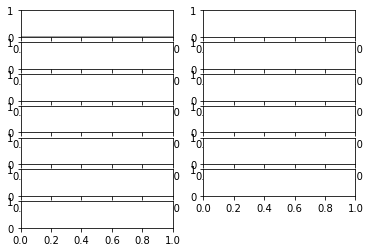

In [ ]:
plot_ale(logit_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)

As logistic regression is a linear model, we see that the feature effects for each class and each feature are linear. 

The units on Y-axis are in logits. The feature effect at some feature value will be a positive or negative contribution to the logit of each class with respect to the mean feature effect.

In [ ]:
plot_ale

<function alibi.explainers.ale.plot_ale>

In [ ]:
logit_exp_lr

Explanation(meta={
    'name': 'ALE',
    'type': ['blackbox'],
    'explanations': ['global'],
    'params': {'min_bin_points': 4}
}, data={
    'ale_values': [
        array([[ 0.31280215],
       [ 0.18786654],
       [ 0.16287942],
       [ 0.15038586],
       [ 0.12896833],
       [ 0.11290518],
       [ 0.10041162],
       [ 0.0754245 ],
       [ 0.05043738],
       [ 0.03794382],
       [ 0.02545026],
       [ 0.0129567 ],
       [ 0.00046314],
       [-0.01203042],
       [-0.02452398],
       [-0.03701754],
       [-0.0495111 ],
       [-0.06200466],
       [-0.07449822],
       [-0.08699178],
       [-0.09948534],
       [-0.1119789 ],
       [-0.12447246],
       [-0.14588999],
       [-0.16195314],
       [-0.18694026],
       [-0.28688874]]),
        array([[-0.35030185],
       [-0.12338547],
       [ 0.35134748]]),
        array([[-0.79723716],
       [-0.32070448],
       [ 0.1558282 ],
       [ 0.63236088]]),
        array([[-0.6246232 ],
       [-0.38303667],
       [

Now expalining a bit deeply into the 'petal-length' feature.

In [ ]:
plot_ale(logit_exp_lr, features=[2]);


The Explanation object is not a dictionary anymore and accessing elements should be done via attribute access. Accessing via item will stop working in a future version.


TypeError: ignored

Around 3.8 cm, we can see that the feature effect on the prediction is same as the average feature effect based on all the features, where the ALE lines cross the x-axis (0 level).    

Now we calculate the mean response in logit space of the model on the training set

In [ ]:
mean_logits = logit_fun_lr(X_train).mean(axis=0)
mean_logits

array([-0.64217784,  2.26729969, -1.62512184])

Now, we find the instances where the petal-length is around 3.8 cm

In [ ]:
lower_index = np.where(logit_exp_lr.feature_values[2] < 3.8)[0][-1]
upper_index = np.where(logit_exp_lr.feature_values[2] > 3.8)[0][0]
subset = X_train[(X_train[:, 2] > logit_exp_lr.feature_values[2][lower_index])
                 & (X_train[:, 2] < logit_exp_lr.feature_values[2][upper_index])]
print(subset.shape)

(8, 4)


In [ ]:
subset_logits = logit_fun_lr(subset).mean(axis=0)
subset_logits

array([-1.33635931,  2.32687313, -0.99051382])

Now, we subtract the mean_logits with subset_logits for the instances where petal-length is around 3.8 cm

In [ ]:
mean_logits - subset_logits


array([ 0.69418147, -0.05957344, -0.63460803])

As ALE at 3.8 cm is 0 for petal-length, we can conclude that the 3 values which we got are due to the combined effect of the other features except petal-length 

Now we plot a histogram for the feature petal-length

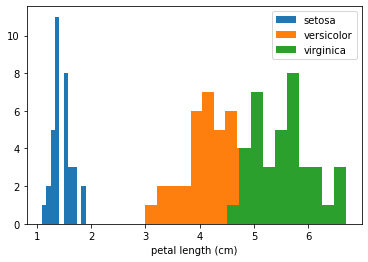

In [ ]:
fig, ax = plt.subplots()
for target in range(3):
    ax.hist(X_train[y_train==target][:,2], label=target_names[target]);

ax.set_xlabel(feature_names[2])
ax.legend();

Here we can see that the 3 classes are well separated. The feature effects of small value of “petal length” are that of increasing the logit values for the class “setosa” and decreasing for the other two classes.

The ALE values are comparatively high here, which denotes that this feature has more importance on predicting the species.

## Probability space

Plotting the ALE plots based on feature effects on the probabilities of each class

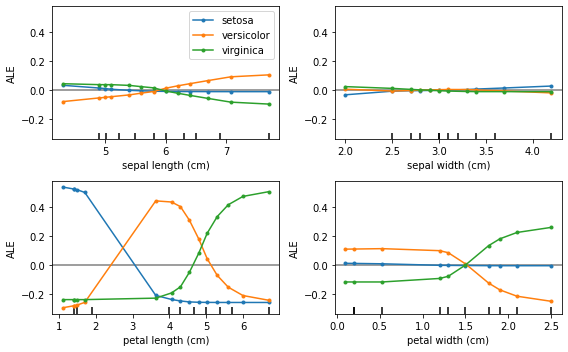

In [ ]:
plot_ale(proba_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5});


As softmax transformation is applied to the logits, the ALE plots are non-linear

The Y-axis (ALE) are in the units of relative probability mass, i.e. given a feature value how much more or less probability the model assigns to each class relative to the mean prediction.

In simpler terms, the increase in relative probabilty of one class results in decrease in probability of another class. 


We can see that for petal-length, the 3 probabilites are approximately 0.4, -0.2 and -0.2, whose sum results to 0.

In [ ]:
for feature in range(4):
    print(proba_exp_lr.ale_values[feature].sum())

8.326672684688674e-17
2.220446049250313e-16
1.1102230246251565e-15
1.6653345369377348e-16


We can also see from the petal-width for setosa that the curve is almost flat, which means that this feature is not used by the model to assign the prediction probabilities for setosa wrt the average prediction.

This observation is diffrent from that in the logit space.

The ALE curve in the logit space shows a negative effect with feature value, the effect in the logit space is not significant enought to translate into a tangible effect in the probability space.

Now we plot a histogram for sepal-width

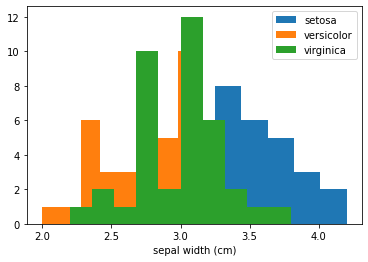

In [ ]:
fig, ax = plt.subplots()
for target in range(3):
    ax.hist(X_train[y_train==target][:,1], label=target_names[target]);

ax.set_xlabel(feature_names[1])
ax.legend();

This plot does not provide a concrete info to the model to predict an class over another wrt mean effect of sepal-width. This is due to the overlapping in the histogram, and so it does not increase the model discrimnative power.

# 2. Using Gradient Boosting Model :

Now, we see the effects of ALE on a non linear model. Using Gradient Boosting.


In [ ]:
#from xgboost import XGBClassifier, plot_importance

In [ ]:
# %%time
# # ML in two lines ;)
# xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
# xgb.fit(X_train, y_train)

CPU times: user 53.4 ms, sys: 15 ms, total: 68.4 ms
Wall time: 141 ms


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Testing the accuracy.

In [ ]:
accuracy_score(y_test, gb.predict(X_test))


0.85

The accuracy is perfect

There are several different options for explaining the predictions and model using ALE. We use logit space and probability space and visualise the results. 

In [ ]:
logit_fun_gb = gb.decision_function
proba_fun_gb = gb.predict_proba

In [ ]:
logit_ale_gb = ALE(logit_fun_gb, feature_names=features, target_names=['0','1'])
proba_ale_gb = ALE(proba_fun_gb, feature_names=features, target_names=['0','1'])

In [ ]:
logit_exp_gb = logit_ale_gb.explain(X_train.values[:,:])
proba_exp_gb = proba_ale_gb.explain(X_train.values[:,:])

Plotting the graphs for all features towards the unnormalized logit space

IndexError: ignored

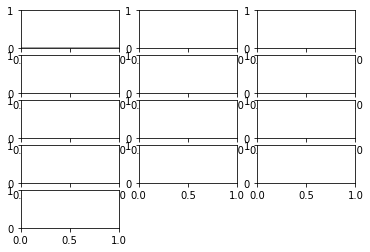

In [ ]:
plot_ale(logit_exp_gb,  fig_kw={'figwidth': 8, 'figheight': 5});

As we can see from the plots, the non linear model has curves in graph. This is different from linear models shown above, where each graph had only straight lines. 

From these graphs, we can interpret that the features petal length and petal width have the most influence on the predictions. We can come to this conclusion by looking at how much the plot varies over a certain range. 

In [ ]:
gb.feature_importances_


array([0.00222554, 0.01507281, 0.57189704, 0.41080462])

By printing out the feature importances, we can see that our deduction was right. Petal Length is the most important feature. Sepal Length is the least important feature. 

Plotting the graphs for all features towards the probability space

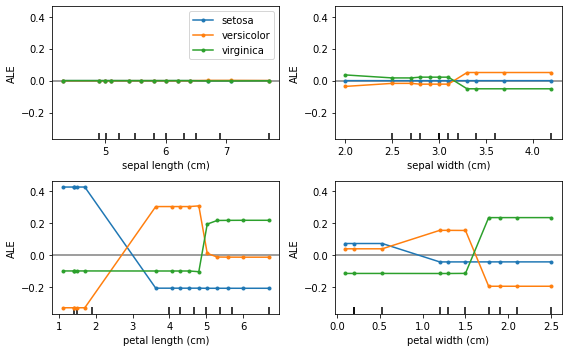

In [ ]:
plot_ale(proba_exp_gb, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5});


As we can see, these plots are similar to the ones shown for logit space. The main difference between the two is the scale on y-axis. These plots are again, congruent with our deductions earlier about petal length being the most important feature and sepal length being the least important. 

Now, we compare the results from using a Linear Regression Model and using a Gradient Boosting Model. As we have deducted that petal length and petal width are the most important features, we show the difference in ALE values for LR model and GB model by comparing ALE curves for them. 

In the following geaphs, we plot the ALE curves of the aforementioned features for predicting the class 'setosa' in probability space.

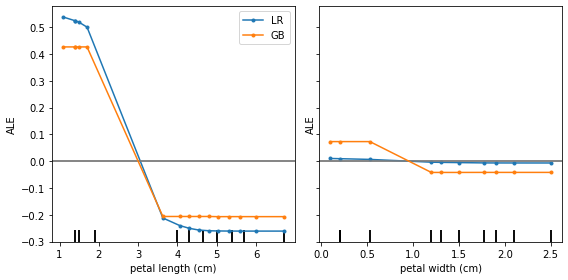

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'LR'});
plot_ale(proba_exp_gb, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'GB'});

We can make the following deductions from the graphs :

1.   In both models, the feature weight of petal length for predicting class 'setosa' is high. It has a high positive influence till about 2cm, before dropping off and going to the negative side at about 3cm. From about 3.6cm onwards, the feature has a high negative influence on predicting the class 'setosa'
2.   Conversely, the second graph shows that the feature weight of petal width has a high importance in the GB Model, but doesn't affect the predictions of 'setosa' on LR Model.

